# Bayesian LASSO results figures
* Cross-validation
* Performance
* Feature selection

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

envs = ["YPACETATE", "YPD14", "YPD40", "YPD42", "YPD6AU", "YPDANISO10", 
"YPDANISO20", "YPDANISO50", "YPDBENOMYL200", "YPDBENOMYL500", "YPDCAFEIN40", 
"YPDCAFEIN50", "YPDCHX05", "YPDCHX1", "YPDCUSO410MM", "YPDDMSO", "YPDETOH", 
"YPDFLUCONAZOLE", "YPDFORMAMIDE4", "YPDFORMAMIDE5", "YPDHU", "YPDKCL2M", 
"YPDLICL250MM", "YPDMV", "YPDNACL15M", "YPDNACL1M", "YPDNYSTATIN", "YPDSDS", 
"YPDSODIUMMETAARSENITE", "YPETHANOL", "YPGALACTOSE", "YPRIBOSE", "YPGLYCEROL", 
"YPXYLOSE", "YPSORBITOL"]

# Growth Conditions and Descriptions
# growth temperature is 30C if not specified
cond = {"YPDKCL2M":"YPD KCL 2M", "YPGALACTOSE":"YP Galactose 2%", "YPD40":"YPD 40C", 
"YPDCHX05":"YPD Cycloheximide 0.5µg/ml", "YPDLICL250MM":"YPD LiCl 250mM", 
"YPGLYCEROL":"YP Glycerol 2%", "YPD42":"YPD 42C", "YPDCHX1":"YPD Cycloheximide 1µg/ml", 
"YPDMV":"YPD Methylviologen 20mM", "YPRIBOSE":"YP Ribose 2%", "YPD6AU":"YPD 6-Azauracile 600µg/ml", 
"YPDCUSO410MM":"YPD CuSO4 10mM", "YPDNACL15M":"YPD NaCl 1.5M", "YPSORBITOL":"YP Sorbitol 2%", 
"YPDANISO10":"YPD Anisomycin 10µg/ml", "YPDNACL1M":"YPD NaCl 1M", "YPXYLOSE":"YP Xylose 2%", 
"YPDANISO20":"YPD Anisomycin 20µg/ml", "YPDETOH":"YPD Ethanol 15%", "YPDSDS":"YPD SDS 0.2%", 
"YPDSODIUMMETAARSENITE":"YPD Sodium metaarsenite 2.5mM", "YPDNYSTATIN":"YPD Nystatin 10µg/ml", 
"YPDFLUCONAZOLE":"YPD Fluconazole 20µg/ml", "YPACETATE":"YP Acetate 2%", "YPDCAFEIN40":"YPD Caffeine 40mM", 
"YPDHU":"YPD Hydroxyurea 30mg/ml", "YPETHANOL":"YP Ethanol 2%", "YPD14":"YPD 14C", 
"YPDCAFEIN50":"YPD Caffeine 50mM", "YPDDMSO":"YPD DMSO 6%", "YPDANISO50":"YPD Anisomycin 50µg/ml", 
"YPDBENOMYL200":"YPD Benomyl 200µg/ml", "YPDFORMAMIDE4":"YPD Formamide 4%", 
"YPDBENOMYL500":"YPD Benomyl 500µg/ml", "YPDFORMAMIDE5":"YPD Formamide 5%"}

# Directory containing rrBLUP results data
os.chdir("/mnt/gs18/scratch/users/seguraab/yeast_project/yeast_BL_results/")

# Directory to save figures and data
dir = "/mnt/home/seguraab/Shiu_Lab/Project/Scripts/Genomic_Prediction_BL/Figures"
dir2 = "/mnt/home/seguraab/Shiu_Lab/Project/Results"

os.getcwd()

'/mnt/gs18/scratch/users/seguraab/yeast_project/yeast_BL_results'

## Context-specific model performance during training of validation set and test set

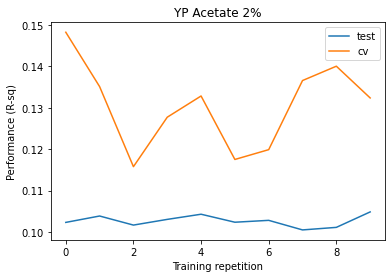

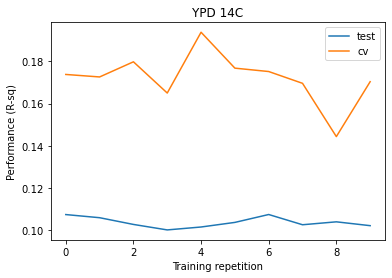

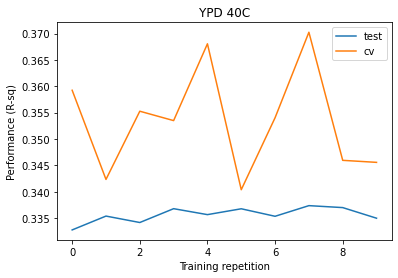

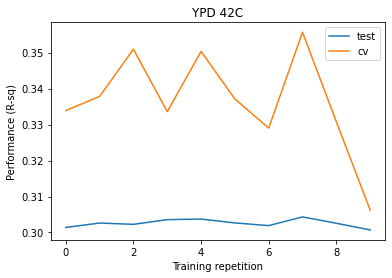

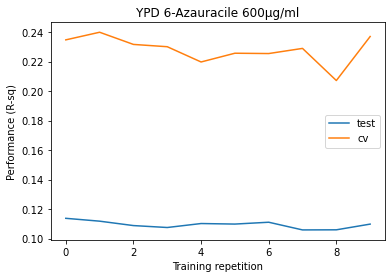

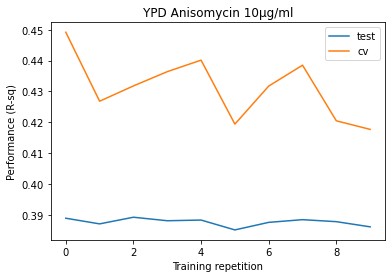

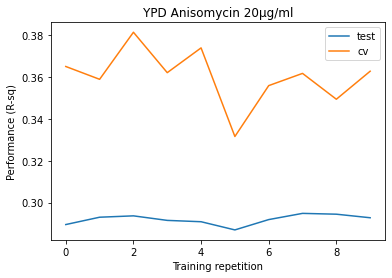

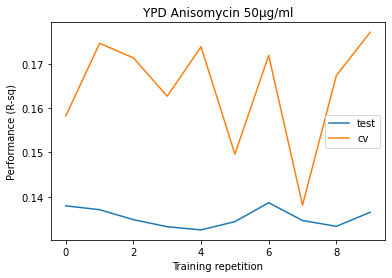

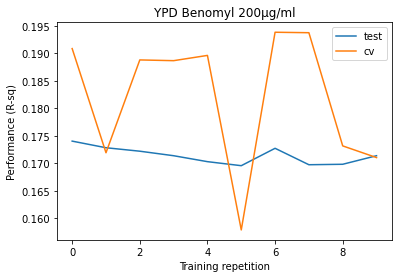

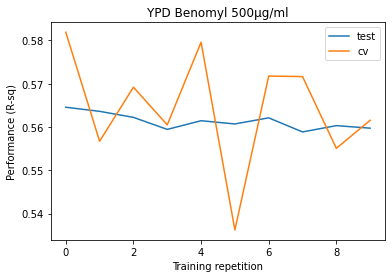

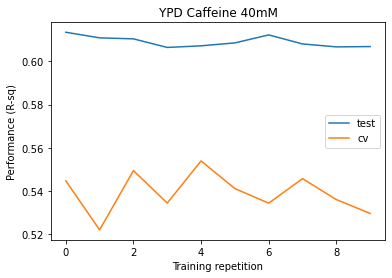

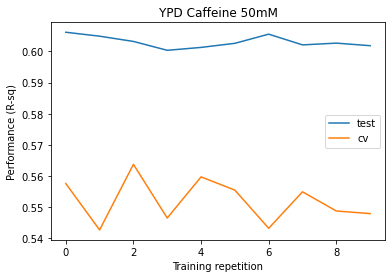

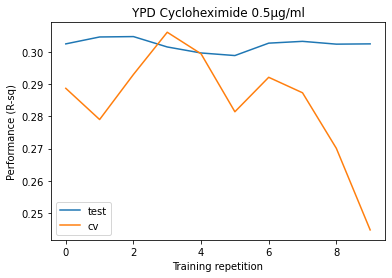

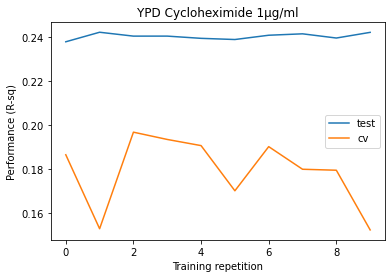

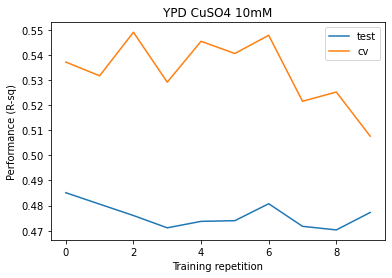

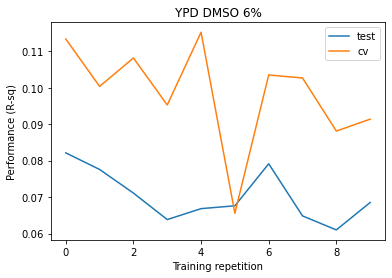

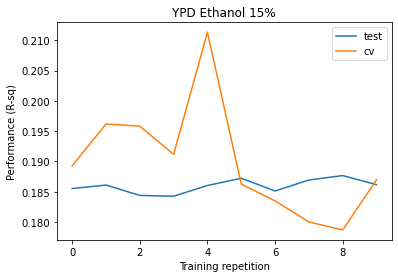

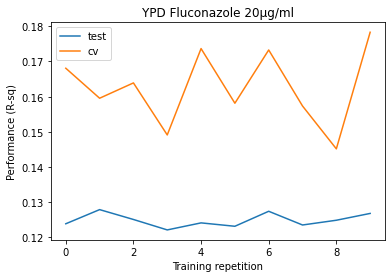

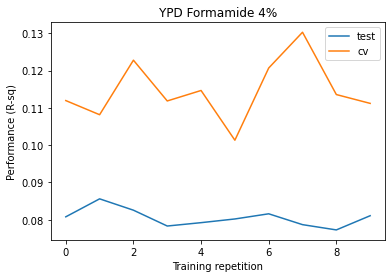

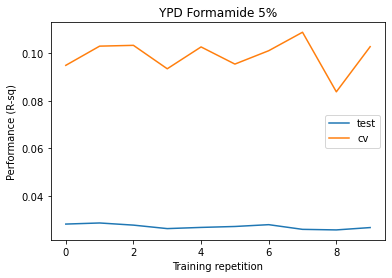

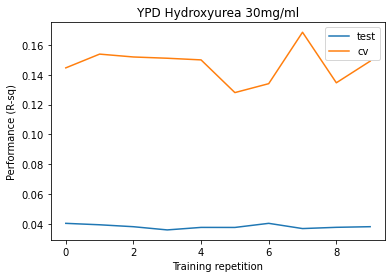

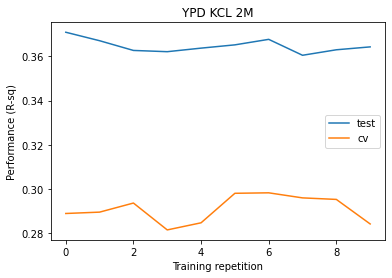

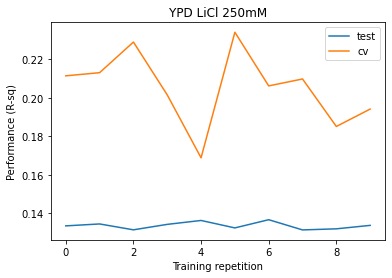

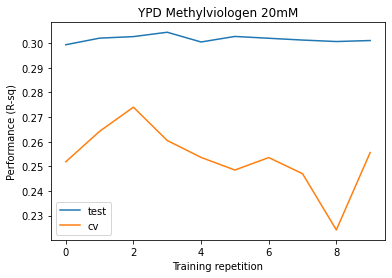

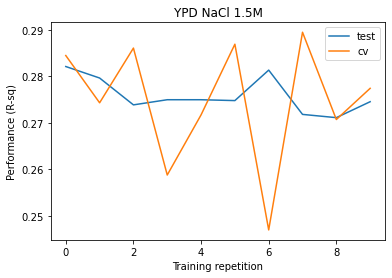

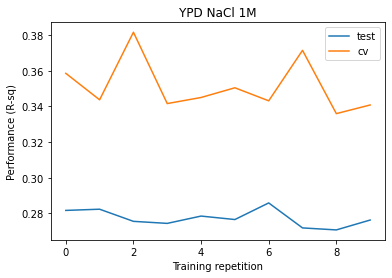

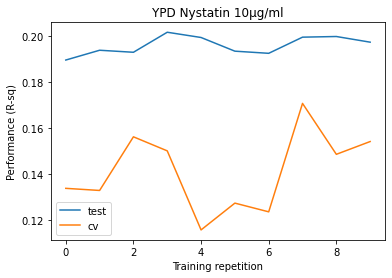

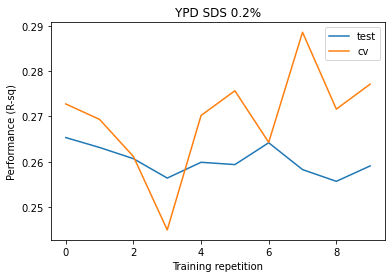

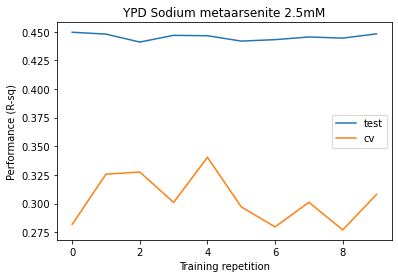

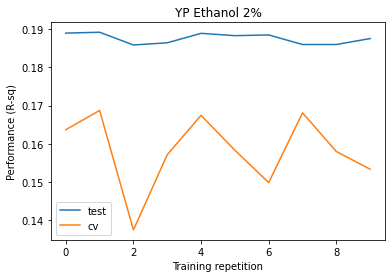

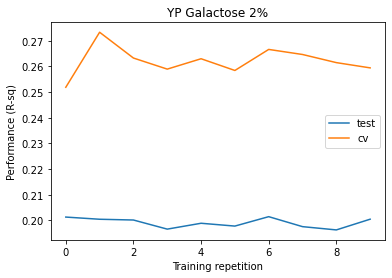

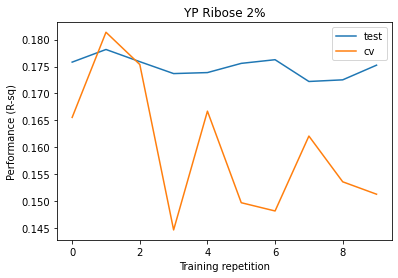

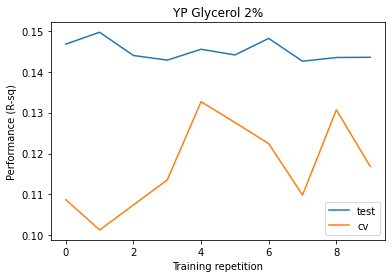

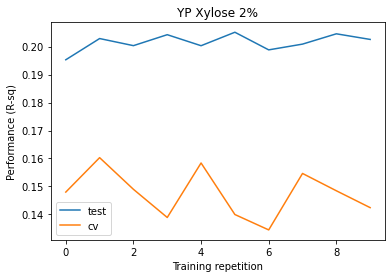

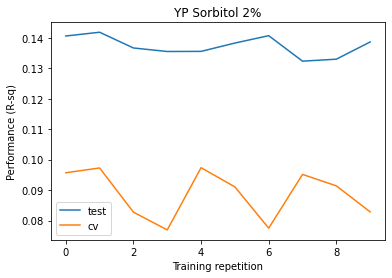

In [2]:
results_test = {}
results_cv = {}
for env in envs:
    test = pd.read_csv("R2_test_results_BL_geno_%s.csv"%env)
    cv = pd.read_csv("R2_cv_results_BL_geno_%s.csv"%env)
    # average results for all envs
    results_test[cond[env]] = test.mean()[0]
    results_cv[cond[env]] = cv.mean()[0]
    # plot performance on test set and validation set
    ax = test.plot(xlabel="Training repetition", ylabel="Performance (R-sq)")#, title=cond[env].values)
    cv.plot(ax=ax)
    plt.legend(["test", "cv"])
    plt.title(cond[env])
    plt.savefig("%s/BL_R2_cv_and_test_%s.pdf"%(dir,env))

# Average performance of each context-specific model
results_test = pd.Series(data = results_test)
results_cv = pd.Series(data = results_cv)

# save to file
results_test.to_csv("%s/BL_average_test_R2.csv"%dir2)
results_cv.to_csv("%s/BL_average_cv_R2.csv"%dir2)

## Average performance R-sq for each context-specific model

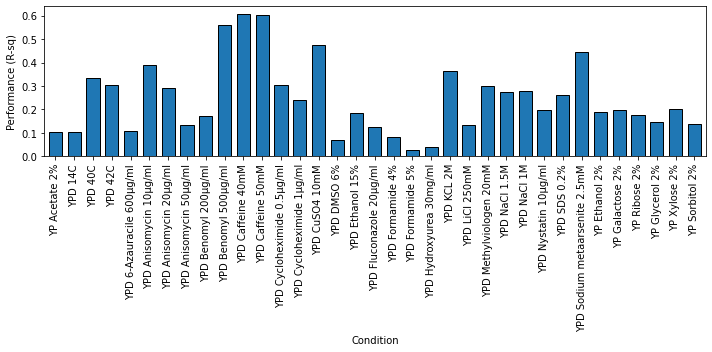

In [3]:
results_test.plot(kind="bar", width=0.7, edgecolor="black", figsize=(10,5), ylabel="Performance (R-sq)", xlabel="Condition")
plt.tight_layout()
plt.savefig("%s/BL_average_test_R2_v_Conditions_barplot.pdf"%dir)

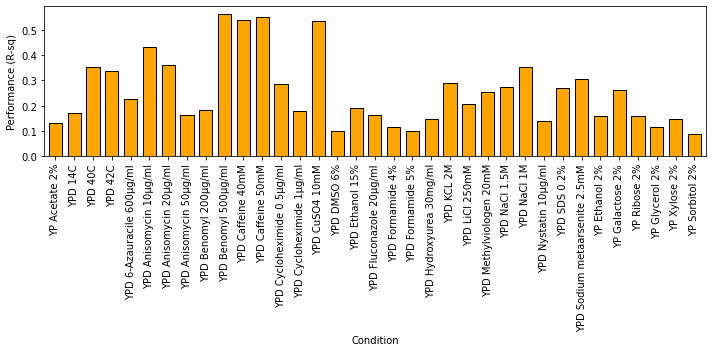

In [4]:
results_cv.plot(kind="bar", color="orange", width=0.7, edgecolor="black", figsize=(10,5), ylabel="Performance (R-sq)", xlabel="Condition")
plt.tight_layout()
plt.savefig("%s/BL_average_CV_R2_v_Conditions_barplot.pdf"%dir)

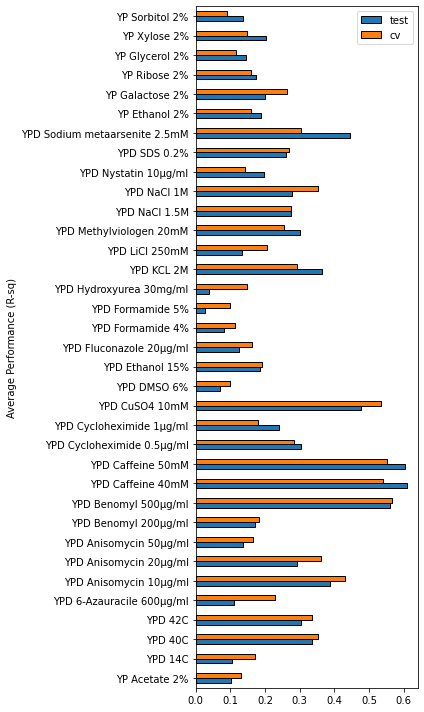

In [5]:
results = pd.concat([results_test, results_cv], axis=1)
results.columns = ["test", "cv"]
results.plot(kind="barh", edgecolor="black", figsize=(6,10), xlabel="Average Performance (R-sq)", ylabel="Conditions")
plt.tight_layout()
plt.savefig("%s/BL_average_combined_R2_v_Conditions_barplot.pdf"%dir)